# Ryan Tschritter

## Research Questions / Interests (Revised April 5)

1. **How are the statistics correlated in each season and between both seasons?**

2. **Will a player with better offensive statistics in 2017 receive more time on ice in the next season? Does the coach give them more time on ice?**

3. **Does a players positive offensive performance in the previous season lead to more penalty time / body checks in the next season? Do they develop a ego?**

## Analysis Plan

Question 1
1. Generate correlation matrix for all columns of data in each dataset and combined datasets

Question 2
1. Combine all positive statistics into a single statistic by normalizing each statistic and then adding all the normalizations together into a single score.
2. Compare this single normalized score to the time on ice in the next season and visualize the trends.

Question 3
1. Take the single normalized score from question 2 and compare it to the penalty time in the next season.

## Analysis Pipeline
---

In [194]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
import sys
import importlib
sys.path.append('..')
from analysis.code import project_functions3 as pf3
importlib.reload(pf3) # Forcing a reload of the function because it was running a old verion in memory

# Method chaining function
nhlMerged = pf3.load_and_merge3('../data/processed/Data301ProjectData2017.csv', '../data/processed/Data301ProjectData2018.csv')

In [196]:
# Import Merged Dataset with sufixes
#nhlMerged = pd.read_csv('../data/processed/merged.csv')

In [197]:
#Import Individual Datasets
nhl2017 = pd.read_csv('../data/processed/clean2017.csv')
nhl2018 = pd.read_csv('../data/processed/clean2018.csv')

In [198]:
# View the shape of the dataframes (ie. the number of columns and rows)
fstring1 = f"The shape of the 2017 dataframe is {nhl2017.shape}."
fstring2 = f"The shape of the 2018 dataframe is {nhl2018.shape}."
fstring3 = f"The shape of the merged dataframe is {nhlMerged.shape}."
print(fstring1)
print(fstring2)
print(fstring3)

The shape of the 2017 dataframe is (225, 19).
The shape of the 2018 dataframe is (225, 19).
The shape of the merged dataframe is (225, 37).


In [199]:
# Check to make sure the 2017 names match the 2018 names
print(nhl2017['Name'].equals(nhl2018['Name']))
print(nhlMerged['Name'].equals(nhl2018['Name']))

True
True


In [200]:
# Python dictionary for column titles
legend = {
    'Rk':'Rank In List', # The order when the data was exported from the website
    'GP':'Games Played', # The number of games played in the season
    'G':'Goals Scored', # The total number of goals scored in the season
    'A':'Assists', # The number of assists in the season
    'P':'Points', # Goals plus assists equals points
    'PIM':'Penalty Minutes', # Total number of minutes spent in the penalty box
    '+/-':'Plus Minus', # Tracks difference in goals scored when on ice, plus one when a goal is scored, minus one when a opposing team scores
    'TOI':'Average Time on Ice', # The average time on ice per game
    'PPG':'Power-Play Goals', # Number of goals score by a player when team has a power play
    'GWG':'Game-Winning Goals', # The player that scored the final goal of the game (total cumulative)
    'PPP':'Power-Play Points', # Players own power play points, positively correlated with power play goals and power play assists
    'G/GP':'Goals Per Game Played', # Goals per game played accounts for players that haven't played every game
    'A/GP':'Assists Per Game Played', # Assists per game played accounts for players that haven't played every game
    'P/GP':'Points Per Game Played', # Points per game played accounts for players that haven't played every game
    'SHOTS':'Shots On Goal', # Number of attempted shots on goal
    'SH%':'Shot Percentage', # Percent of shots that are goals
    'HITS':'Hits', # Number of body checks performed on the opposing team puck carrier
    'BS':'Blocked Shots' # Number of shots blocked by a player
}

# Exploratory Data Analysis
---

In [201]:
nhl2017.head(3)

,Rk,Name,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,185,Aaron Ekblad,82,16,22,38,71,9,23:22,5,4,11,0.195,0.268,0.463,189,8.50%,69,121
1,115,Adam Henrique,81,24,26,50,20,11,17:46,6,8,13,0.296,0.321,0.617,151,15.90%,61,61
2,193,Adrian Kempe,81,16,21,37,49,11,13:19,1,3,5,0.198,0.259,0.457,119,13.50%,91,18


In [202]:
nhlMerged.head(3)

,Name,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,...,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH_2018,HITS_2018,BS_2018
0,Aaron Ekblad,185,82,16,22,38,71,9,1402,5,...,5,1,10,0.159,0.293,0.451,180,7.2,114,88
1,Adam Henrique,115,81,24,26,50,20,11,1066,6,...,8,3,13,0.220,0.293,0.512,122,14.8,78,71
2,Adrian Kempe,193,81,16,21,37,49,11,799,1,...,0,2,4,0.148,0.198,0.346,118,10.2,86,21


In [203]:
# nhlMerged.describe().T
# Hiding output to reduce file length

### Comments about the dataframe describe and analysis pipeline

- Some of the mean statistics for 2017 and 2018 are very close, such as the time on ice (TOI)
- When averages and data is simmilar between seasons like this, other analysis methods such as standard deviation become more important

[Text(0.5, 1.0, '2018 Season'),
 Text(0.5, 0, 'Average Time on Ice (min)'),
 Text(0, 0.5, '')]

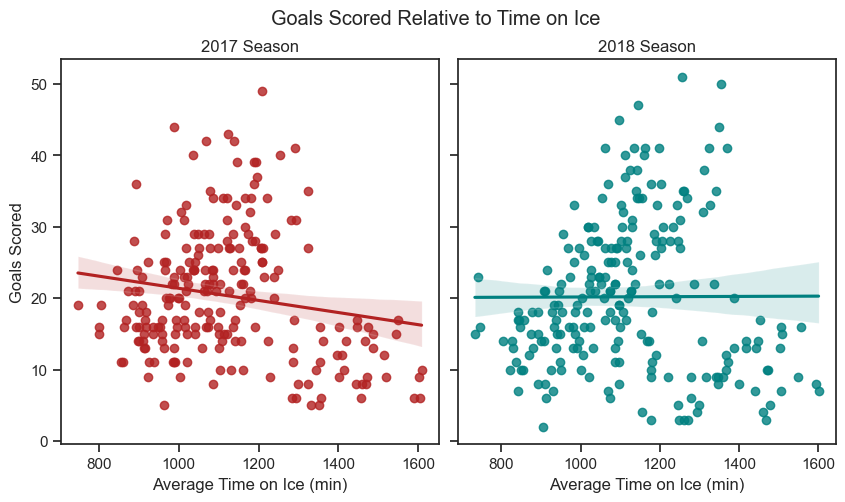

In [204]:
# Plot 1 
sns.set(style = 'ticks')
plot1, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
plot1.suptitle('Goals Scored Relative to Time on Ice')
plot1.subplots_adjust(wspace=0.05)
sns.regplot(ax=axes[0], data = nhlMerged, x = "TOI_2017", y = "G_2017", color = "firebrick")
sns.regplot(ax=axes[1], data = nhlMerged, x = "TOI_2018", y = "G_2018", color = "teal")
axes[0].set(title='2017 Season', xlabel=legend['TOI']+' (min)', ylabel=legend['G'])
axes[1].set(title='2018 Season', xlabel=legend['TOI']+' (min)', ylabel='')

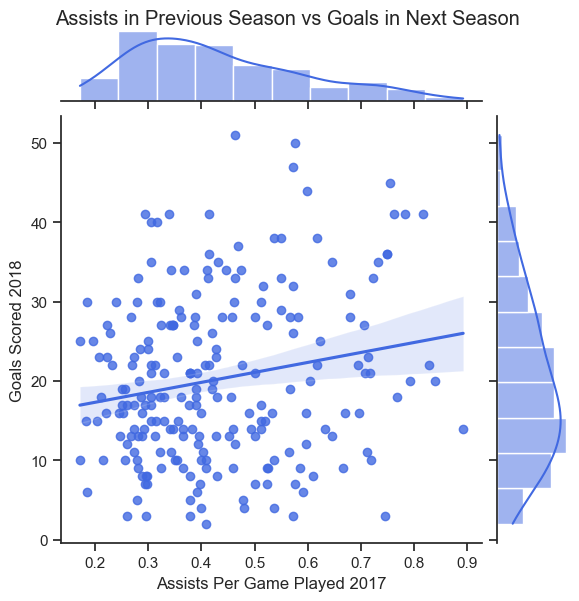

In [205]:
# Plot 2
sns.set(style = 'ticks')
plot2 = sns.jointplot(data=nhlMerged, x = "A/GP_2017", y = "G_2018", kind = "reg", color = "royalblue")
plot2.set_axis_labels(xlabel=legend['A/GP']+' 2017', ylabel=legend['G']+' 2018')
plt.suptitle('Assists in Previous Season vs Goals in Next Season', y=1)
sns.set(font_scale=1)

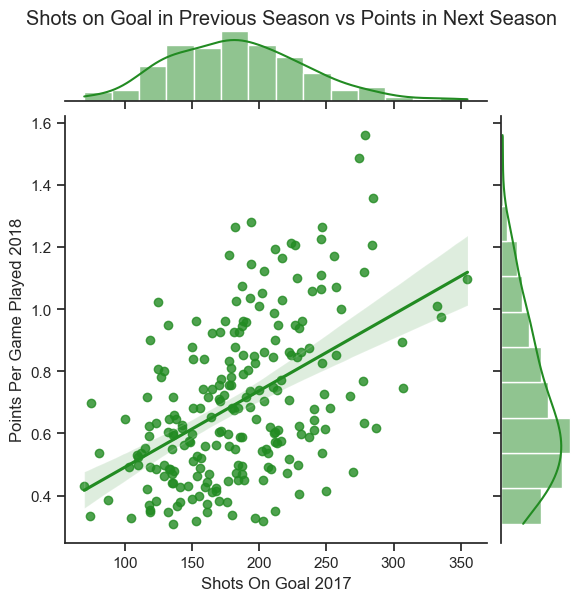

In [206]:
# Plot 3
sns.set(style = 'ticks')
plot3 = sns.jointplot(data=nhlMerged, x = "SHOTS_2017", y = "P/GP_2018", kind = "reg", color = "forestgreen")
plot3.set_axis_labels(xlabel=legend['SHOTS']+' 2017', ylabel=legend['P/GP']+' 2018')
plt.suptitle('Shots on Goal in Previous Season vs Points in Next Season', y=1)
sns.set(font_scale=1)

## Some Notes About The Visualizations

- I was expecting a positive correlation between time on ice and goals score but there wasn't, possibly even a negative correlation
- There is a slight trend with the assists in the previous season leading to more goals in the next season
- The corelation matrix shows how the statistics are corelated with eachother, this partially anwsers one my past research questions

# Data Analysis
---

## Analysis Question 1

### Lets begin with correlation matrices for all three datasets (2017, 2018 and merged)

In [207]:
# Create a reduced dataframe to find significant correlations
reduced2017 = nhl2017[['GP','P','PIM','TOI','PPP','P/GP','SHOTS']]
reduced2018 = nhl2018[['GP','P','PIM','TOI','PPP','P/GP','SHOTS']]
reducedmerg = nhlMerged[['GP_2017','P_2017','PIM_2017','TOI_2017','PPP_2017','P/GP_2017','SHOTS_2017',
                         'GP_2018','P_2018','PIM_2018','TOI_2018','PPP_2018','P/GP_2018','SHOTS_2018']]

reduced2017 = reduced2017.corr(numeric_only=True).round(3)
reduced2018 = reduced2018.corr(numeric_only=True).round(3)
reducedmerg = reducedmerg.corr(numeric_only=True).round(3)

reducedmerg = reducedmerg.iloc[7:14, 0:7] # Trim it down to the bottom left of the dataframe

plotmask2017 = np.triu(np.ones_like(reduced2017, dtype=bool), k=1)
plotmask2018 = np.triu(np.ones_like(reduced2018, dtype=bool), k=1)
#plotmaskmerg = np.triu(np.ones_like(reducedmerg, dtype=bool), k=1)

[Text(0.5, 1.0, '2018 Season')]

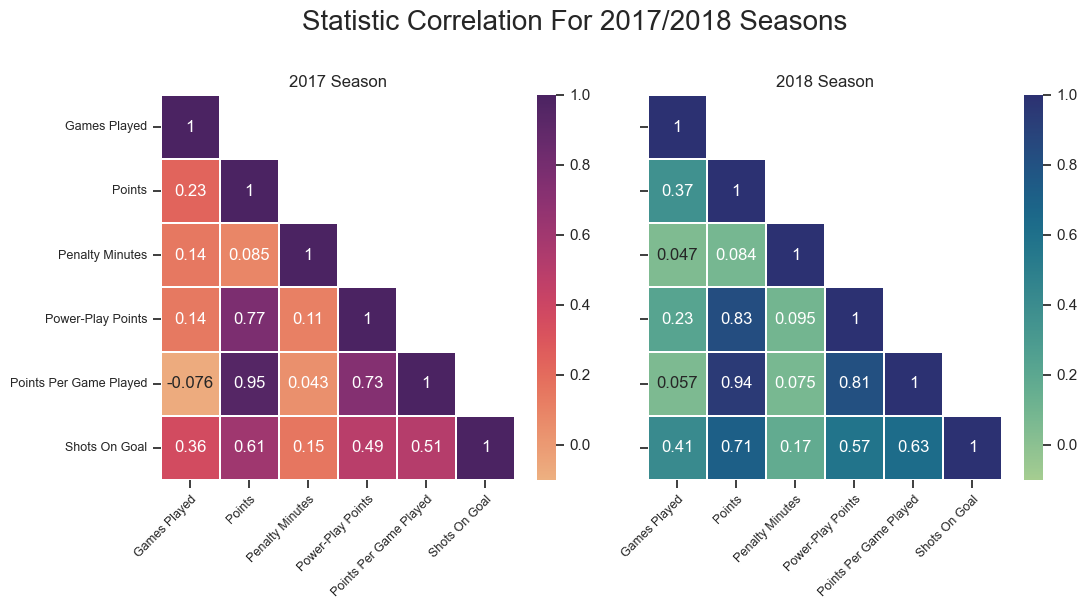

In [208]:
sns.set(style = 'ticks')
plot4, axes = plt.subplots(1, 2, figsize=(12,5), sharey=False)
plot4.suptitle('Statistic Correlation For 2017/2018 Seasons', size=20, x=0.47, y=1.05)
plot4.subplots_adjust(wspace=0.1)

sns.heatmap(ax=axes[0], data=reduced2017, annot=True, linewidths=0.1, mask=plotmask2017, cmap='flare', vmin=-.1, vmax=1)
sns.heatmap(ax=axes[1], data=reduced2018, annot=True, linewidths=0.1, mask=plotmask2018, cmap='crest', vmin=-.1, vmax=1)

tickLabels = []
for i in list(reduced2017.columns):
    tickLabels.append(legend[i])

axes[0].set_xticklabels(labels=tickLabels, rotation=45, ha='right', rotation_mode='anchor')
axes[0].set_yticklabels(labels=tickLabels, rotation=0, ha='right', rotation_mode='anchor')
axes[1].set_xticklabels(labels=tickLabels, rotation=45, ha='right', rotation_mode='anchor')
axes[1].set_yticklabels(labels='')
axes[0].tick_params(axis='both', which='major', labelsize=9)
axes[1].tick_params(axis='both', which='major', labelsize=9)

axes[0].set(title='2017 Season')
axes[1].set(title='2018 Season')

### Analysis Of The Correlation Matricies For 2017 And 2018 (Shown Above)

This plot shows the two seasons and the corelation of variables within each of the seasons independently. From this plot we can draw a few conclusions. First off, there are some highly correlated variables such as the points and points per game played. This makes sense as if a player is scoring higher points then they should be getting high points per game. However this correlation doesn't say much about the players performance.

---

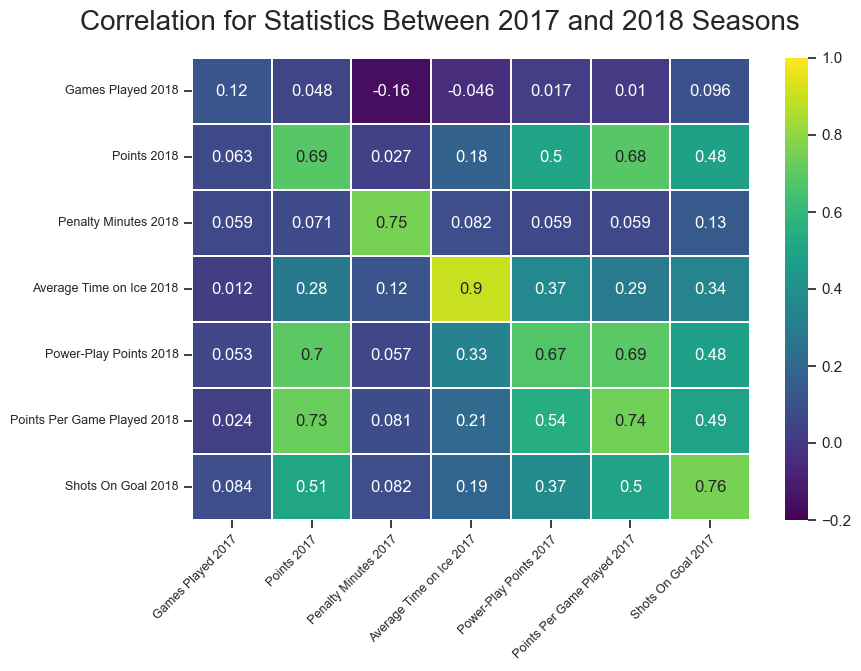

In [209]:
sns.set(style = 'ticks')
plot5, axes = plt.subplots(figsize=(9,6))
plot5.suptitle('Correlation for Statistics Between 2017 and 2018 Seasons', size=20, x=0.4, y=0.96)
sns.set(font_scale=1)
sns.heatmap(data=reducedmerg, annot=True, linewidths=0.1, cmap='viridis', vmin=-.2, vmax=1)

tickLabels2 = []
for i in list(reducedmerg.columns):
    splitList = i.split('_', 1)
    tickLabels2.append(legend[splitList[0]]+" "+splitList[1])
    
tickLabels3 = []
for i in list(reducedmerg.index):
    splitList = i.split('_', 1)
    tickLabels3.append(legend[splitList[0]]+" "+splitList[1])
    
axes.set_xticklabels(labels=tickLabels2, rotation=45, ha='right', rotation_mode='anchor')
axes.set_yticklabels(labels=tickLabels3, rotation=0, ha='right', rotation_mode='anchor')
axes.tick_params(axis='both', which='major', labelsize=9)

### Analysis Of The Correlation Matricies Merged Seasons (Shown Above)

From the graphs above we find that there are a few catagories that are significantely corelated such as the points and points per games played for both seasons, the time on ice for both seasons and the power play points with the regular points. All of the mentioned statistics are all inherently correlated meaning they are expected to have simmilar values and not be statisticly significant. 

---

## Analysis Question 2

### Start by creating a normalized score for the 'positive' offensive statistics for a players performance in 2017

The positive statistics I'll be combining into a normalized value will be:
- Points (Combination of Goals and Assists)
- Power Play Points
- Shots on Goal
- Game winning goals
- Shot Percentage

In [210]:
# Normalization Formula = x - xmin / xmax - xmin
nhlMerged['norm_P_2017'] = nhlMerged['P_2017'].apply(lambda x: (x-nhlMerged['P_2017'].min()) / (nhlMerged['P_2017'].max()-nhlMerged['P_2017'].min()) )
nhlMerged['norm_PPP_2017'] = nhlMerged['PPP_2017'].apply(lambda x: (x-nhlMerged['PPP_2017'].min()) / (nhlMerged['PPP_2017'].max()-nhlMerged['PPP_2017'].min()) )
nhlMerged['norm_SHOTS_2017'] = nhlMerged['SHOTS_2017'].apply(lambda x: (x-nhlMerged['SHOTS_2017'].min()) / (nhlMerged['SHOTS_2017'].max()-nhlMerged['SHOTS_2017'].min()) )
nhlMerged['norm_GWG_2017'] = nhlMerged['GWG_2017'].apply(lambda x: (x-nhlMerged['GWG_2017'].min()) / (nhlMerged['GWG_2017'].max()-nhlMerged['GWG_2017'].min()) )
nhlMerged['norm_SH_2017'] = nhlMerged['SH_2017'].apply(lambda x: (x-nhlMerged['SH_2017'].min()) / (nhlMerged['SH_2017'].max()-nhlMerged['SH_2017'].min()) )


[Text(0.5, 0, 'Normalized Distribution')]

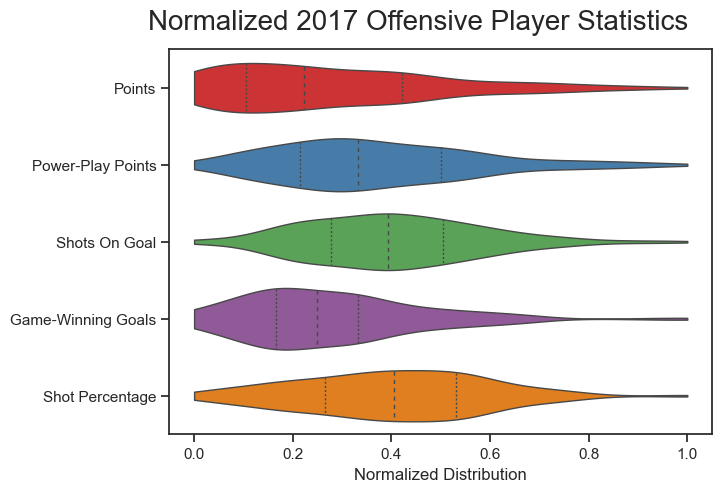

In [211]:
sns.set(style = 'ticks')
plot6, axes = plt.subplots(figsize=(7,5))
plot6.suptitle('Normalized 2017 Offensive Player Statistics', size=20, x=0.48, y=0.96)
sns.set(font_scale=0.8)
sns.violinplot(data=nhlMerged[['norm_P_2017', 'norm_PPP_2017', 'norm_SHOTS_2017', 'norm_GWG_2017', 'norm_SH_2017']], 
               inner='quartile', 
               orient='h',
               linewidth=1,
               palette='Set1',
               cut=0)
axes.set_yticklabels(labels=[legend['P'],legend['PPP'],legend['SHOTS'],legend['GWG'],legend['SH%']])
axes.set(xlabel='Normalized Distribution')

### Analysis Of The Normalization of Offensive Player Statistics (Shown Above)

blah blah blah

In [212]:
# Combine all the normalized values into a single value ranging from 0 to 5
nhlMerged['norm_total_2017'] = nhlMerged['norm_P_2017'] + nhlMerged['norm_PPP_2017'] + nhlMerged['norm_SHOTS_2017'] +nhlMerged['norm_GWG_2017'] + nhlMerged['norm_SH_2017']

[Text(0.5, 0, 'Summed Normalized Value (Possible Range: 0 to 5)'),
 Text(0, 0.5, 'Number of Occurrences')]

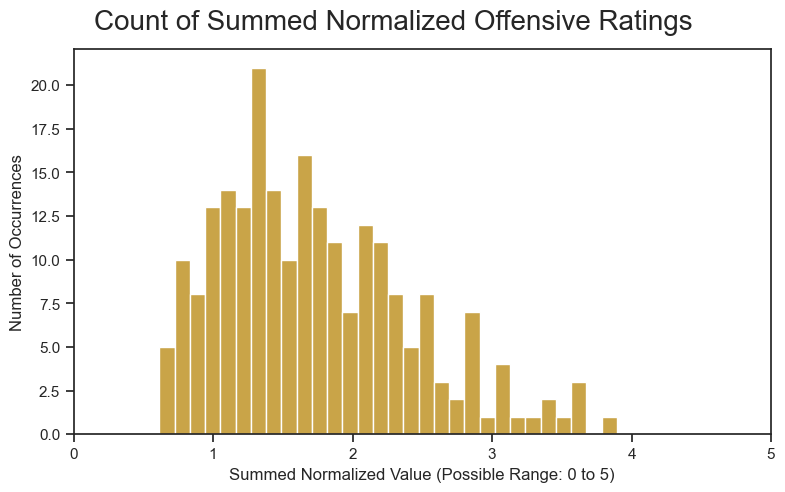

In [213]:
sns.set(style = 'ticks')
plot7, axes = plt.subplots(figsize=(9,5))
plot7.suptitle('Count of Summed Normalized Offensive Ratings', size=20, x=0.48, y=0.96)
sns.set(font_scale=0.8)
sns.histplot(data=nhlMerged, x='norm_total_2017', bins=30, color='darkgoldenrod', ax=axes)
axes.set_xticks(range(0,5+1))
axes.set(xlabel='Summed Normalized Value (Possible Range: 0 to 5)', ylabel='Number of Occurrences')

### Analysis Of The Summed Normalized Offensive Ratings (Shown Above)

blah blah blah

[Text(0.5, 0, 'Player Time on Ice 2018 (min)'),
 Text(0, 0.5, 'Distance to Regression Line (Residual)')]

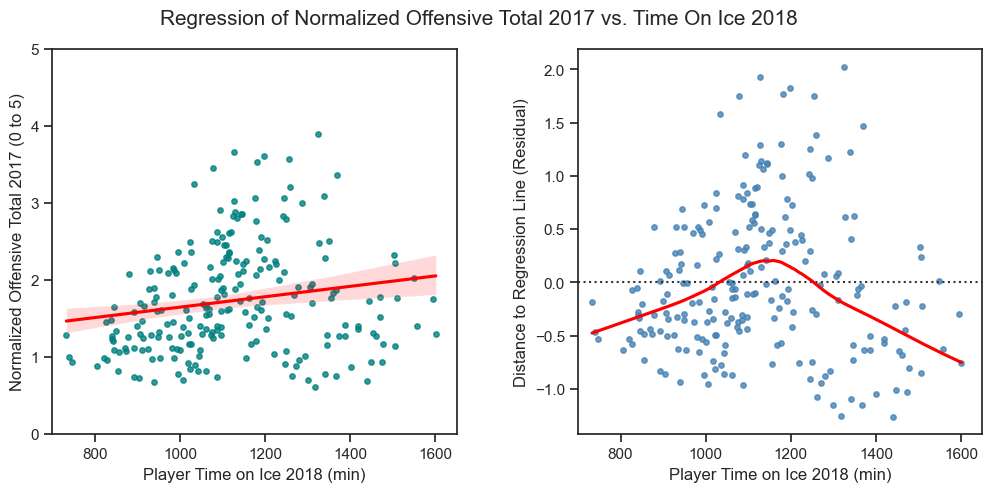

In [236]:
sns.set(style = 'ticks')
plot8, axes = plt.subplots(1, 2, figsize=(12,5))
plot8.subplots_adjust(wspace=0.3)
plot8.suptitle('Regression of Normalized Offensive Total 2017 vs. Time On Ice 2018', size=15, x=0.48, y=0.96)
sns.set(font_scale=0.8)
sns.regplot(data=nhlMerged, x='TOI_2018', y='norm_total_2017', color='teal', scatter_kws={'s':15}, line_kws=dict(color='red'), ax=axes[0])
sns.residplot(data=nhlMerged, x='TOI_2018', y='norm_total_2017', color='steelblue', scatter_kws={'s':15}, lowess=True, line_kws=dict(color='red'), ax=axes[1])
axes[0].set(xlim=(700,1650))
axes[0].set(ylim=(0,5))
axes[1].set(xlim=(700,1650))
axes[0].set(xlabel='Player Time on Ice 2018 (min)', ylabel='Normalized Offensive Total 2017 (0 to 5)')
axes[1].set(xlabel='Player Time on Ice 2018 (min)', ylabel='Distance to Regression Line (Residual)')

### Analysis Of The Regression and Residual Plot (Shown Above)

blah blah blah

[Text(0.5, 0, 'Number of Body Checks 2018'),
 Text(0, 0.5, 'Distance to Regression Line (Residual)')]

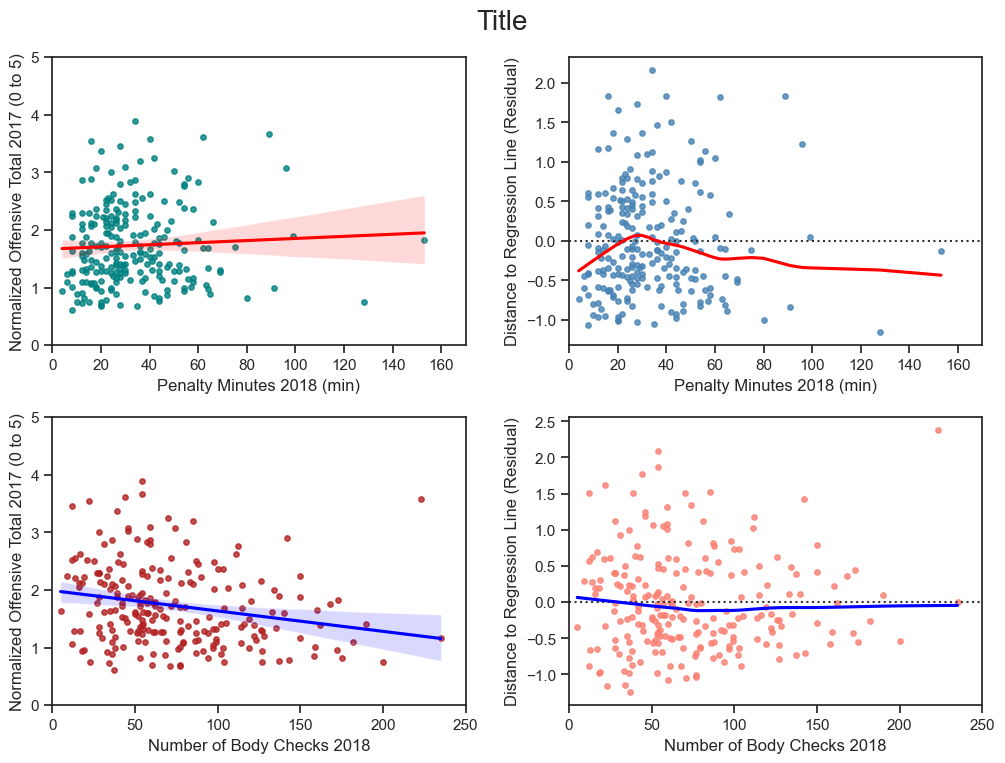

In [237]:
sns.set(style = 'ticks')
plot9, ax = plt.subplots(2,2, figsize=(12,8))
plot9.subplots_adjust(top=0.92, wspace=0.25, hspace=0.25)
plot9.suptitle('Title', size=20)
sns.set(font_scale=0.8)
sns.regplot(data=nhlMerged, x='PIM_2018', y='norm_total_2017', color='teal', scatter_kws={'s':15}, line_kws=dict(color='red'), ax=ax[0,0])
sns.residplot(data=nhlMerged, x='PIM_2018', y='norm_total_2017', color='steelblue', scatter_kws={'s':15}, lowess=True, line_kws=dict(color='red'), ax=ax[0,1])
sns.regplot(data=nhlMerged, x='HITS_2018', y='norm_total_2017', color='firebrick', scatter_kws={'s':15}, line_kws=dict(color='blue'), ax=ax[1,0])
sns.residplot(data=nhlMerged, x='HITS_2018', y='norm_total_2017', color='salmon', scatter_kws={'s':15}, lowess=True, line_kws=dict(color='blue'), ax=ax[1,1])

ax[0,0].set(xlim=(0,170))
ax[0,1].set(xlim=(0,170))
ax[0,0].set(ylim=(0,5))
ax[0,0].set(xlabel='Penalty Minutes 2018 (min)', ylabel='Normalized Offensive Total 2017 (0 to 5)')
ax[0,1].set(xlabel='Penalty Minutes 2018 (min)', ylabel='Distance to Regression Line (Residual)')

ax[1,0].set(xlim=(0,250))
ax[1,1].set(xlim=(0,250))
ax[1,0].set(ylim=(0,5))
ax[1,0].set(xlabel='Number of Body Checks 2018', ylabel='Normalized Offensive Total 2017 (0 to 5)')
ax[1,1].set(xlabel='Number of Body Checks 2018', ylabel='Distance to Regression Line (Residual)')